<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/IMLWO_chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![表紙](https://www.oreilly.co.jp/books/images/picture978-4-87311-916-8.gif)

このノートブックはオライリー・ジャパンより発行の書籍[『ウェブ最適化ではじめる機械学習』（飯塚 修平　著）](https://www.oreilly.co.jp/books/9784873119168/)のサンプルコードです。コードの解説等は書籍をご参照ください。なお、このコードを動作させた結果について、著者およびオライリー・ジャパンは一切の責任を負いません。

# 2章: 確率的プログラミング: コンピュータの助けを借りる

必要なモジュールのインストール

In [ ]:
!pip install -U arviz==0.9.0 pymc3==3.9.3

Requirement already up-to-date: arviz==0.9.0 in /usr/local/lib/python3.6/dist-packages (0.9.0)
Requirement already up-to-date: pymc3==3.9.3 in /usr/local/lib/python3.6/dist-packages (3.9.3)


必要なモジュールの読み込み

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm

plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')
np.random.seed(0)

## 統計モデルの記述とサンプリングの実行

In [ ]:
N = 40  # アリスのデザインA案の表示数
a = 2   # アリスのデザインA案のクリック数

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  # theta = pm.Beta('theta', alpha=1, beta=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.


`pm.traceplot` による、事後分布からのサンプルの可視化

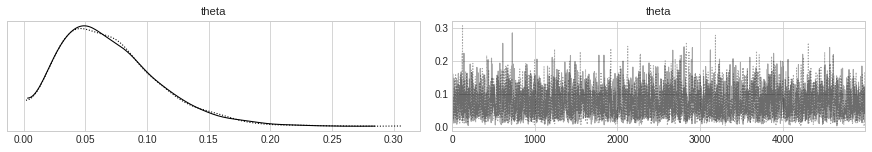

In [ ]:
with model:
  pm.traceplot(trace)

In [ ]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))

        mean     sd  hdi_2.5%  hdi_97.5%  ...  ess_sd  ess_bulk  ess_tail  r_hat
theta  0.071  0.039     0.009      0.147  ...  4743.0    4219.0    5135.0    1.0

[1 rows x 11 columns]


PyMC3によって推論された、アリスのデザインA案のクリック率の事後分布

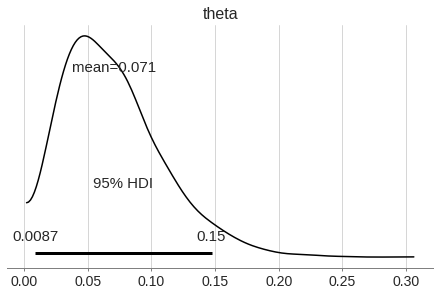

In [ ]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

In [ ]:
print((trace['theta'] - 0.01 > 0).mean())

0.9921


In [ ]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[40, 50], observed=[2, 4])
  trace = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.


アリスのデザイン案AおよびBのクリック率のサンプルの可視化

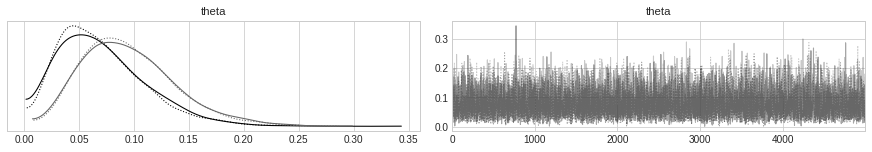

In [ ]:
with model:
  pm.traceplot(trace, ['theta'], compact=True)

In [ ]:
print((trace['theta'][:, 1] - trace['theta'][:, 0] > 0).mean())

0.6699


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.


0.9993


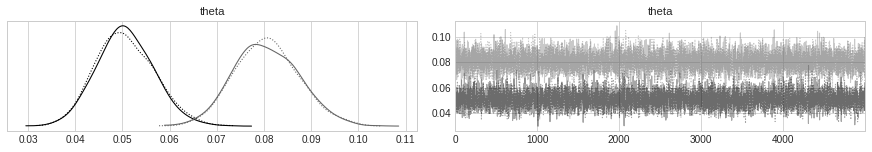

In [ ]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[1280, 1600], observed=[64, 128])
  trace = pm.sample(5000, chains=2)
  print((trace['theta'][:, 0] < trace['theta'][:, 1]).mean())
  pm.traceplot(trace, ['theta'], compact=True)

## 真のレビュースコア

In [ ]:
n_a = [20, 10, 36, 91, 170]
data = [0 for _ in range(n_a[0])]
data += [1 for _ in range(n_a[1])]
data += [2 for _ in range(n_a[2])]
data += [3 for _ in range(n_a[3])]
data += [4 for _ in range(n_a[4])]

with pm.Model() as model_a:
  theta = pm.Dirichlet('theta', a=np.array([1, 1, 1, 1, 1]))
  obs = pm.Categorical('obs', p=theta, observed=data)
  trace_a = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 11 seconds.


商品Aについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ のサンプルの可視化

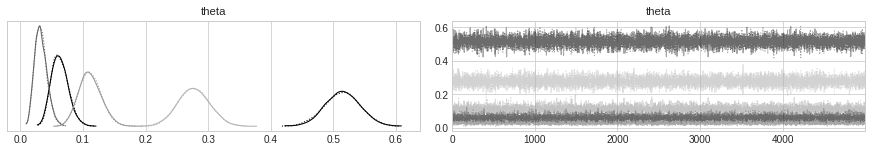

In [ ]:
with model_a:
  pm.traceplot(trace_a)

商品Aについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ の事後分布の可視化

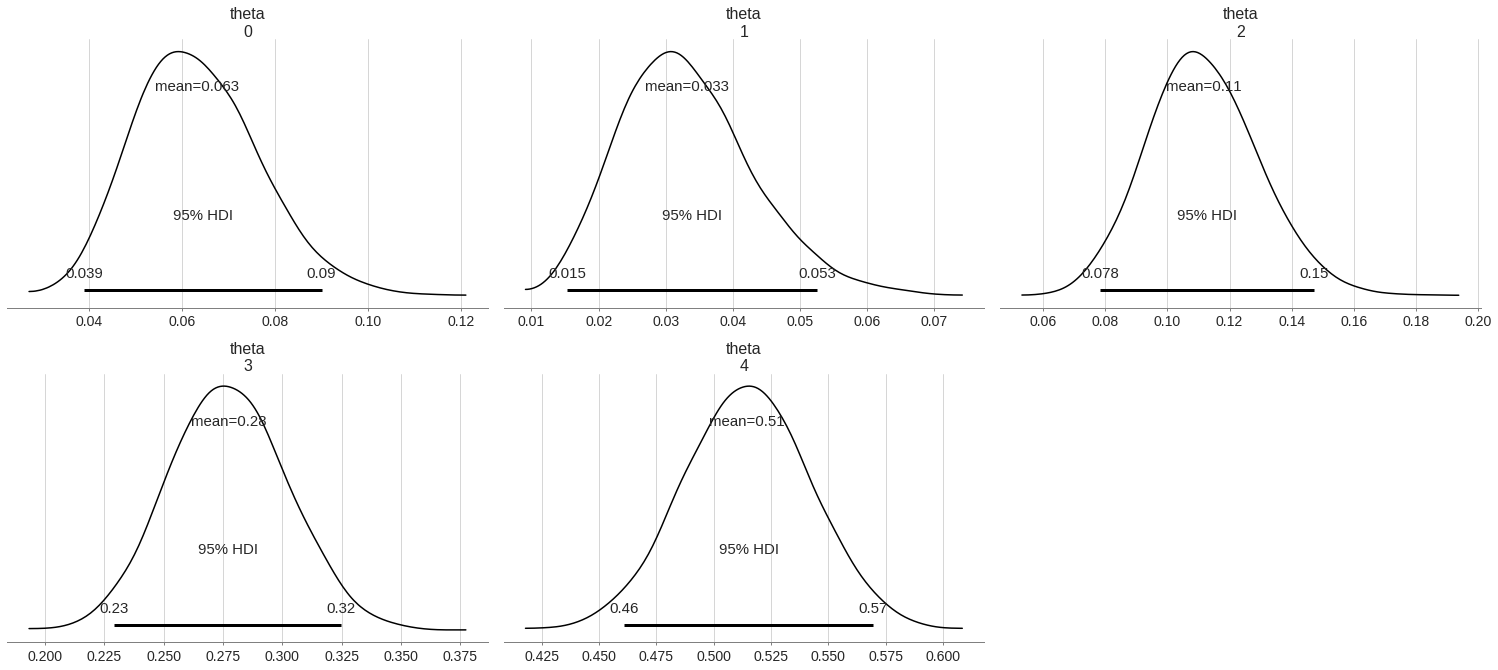

In [ ]:
with model_a:
  pm.plot_posterior(trace_a, hdi_prob=0.95)

In [ ]:
weights = np.array([1, 2, 3, 4, 5])
m_a = [sum(row * weights) for row in trace_a['theta']]
#m_a = np.matmul(trace_a['theta'], weights)

商品Aに対するレビュースコアの平均点の確率変数 $m$ の確率分布

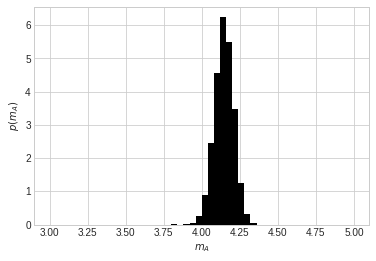

In [ ]:
plt.hist(m_a, range=(3, 5), bins=50, density=True)
plt.xlabel(r'$m_A$')
plt.ylabel(r'$p(m_A)$')
plt.show()

商品Bについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ のサンプルの可視化


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 13 seconds.


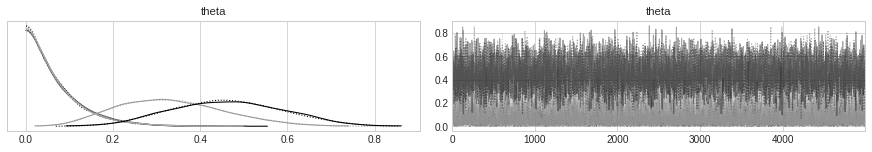

In [ ]:
n_b = np.array([0, 0, 4, 0, 6])
with pm.Model() as model_b:
  theta = pm.Dirichlet('theta', a=np.array([1, 1, 1, 1, 1]))
  obs = pm.Multinomial('obs', p=theta, n=n_b.sum(), observed=n_b)
  trace_b = pm.sample(5000, chains=2)
  pm.traceplot(trace_b)

商品AとBのレビュースコアの平均点の確率密度関数

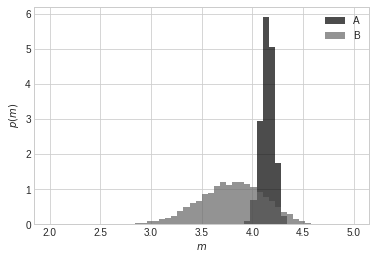

In [ ]:
m_b = [sum(row * weights) for row in trace_b['theta']]
plt.hist(m_a, range=(2, 5), bins=50, density=True, label='A',
         alpha=0.7)
plt.hist(m_b, range=(2, 5), bins=50, density=True, label='B',
         alpha=0.7)
plt.xlabel(r'$m$')
plt.ylabel(r'$p(m)$')
plt.legend()
plt.show()

# 滞在時間をテストする

あるウェブサイトにおける滞在時間（秒）のヒストグラム

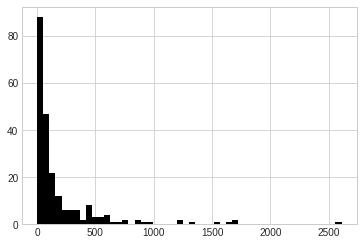

In [ ]:
import urllib
url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
response = urllib.request.urlopen(url)
data = [int(row.strip()) for row in response.readlines()]
plt.hist(data, bins=50)
plt.show()

さまざまな指数分布の例

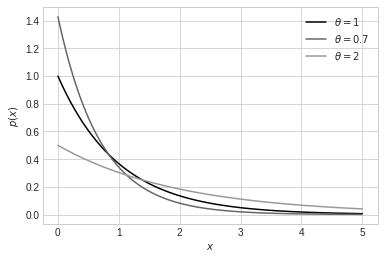

In [ ]:
from scipy import stats
xs = np.linspace(0, 5, 1001)
plt.plot(xs, stats.expon.pdf(xs, 0, 1), label=r'$\theta = 1$')
plt.plot(xs, stats.expon.pdf(xs, 0, 0.7), label=r'$\theta = 0.7$')
plt.plot(xs, stats.expon.pdf(xs, 0, 2), label=r'$\theta = 2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.legend()
plt.show()

確率変数 $\theta$ のサンプルの軌跡

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.


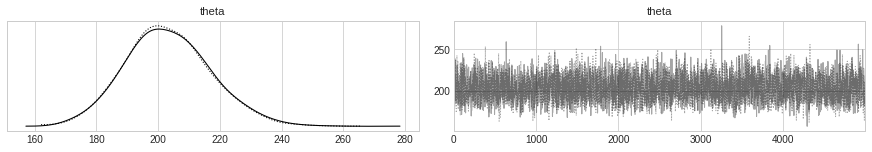

In [ ]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=3000)
  obs = pm.Exponential('obs', lam=1/theta, observed=data)
  trace = pm.sample(5000, chains=2)
  pm.traceplot(trace)

確率変数 $\theta$ の事後分布

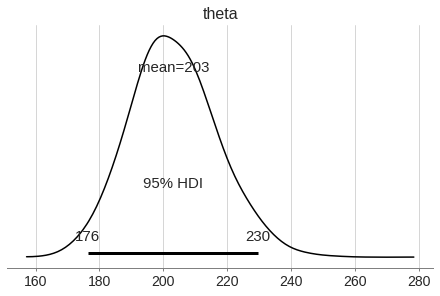

In [ ]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

## なぜベイズ推論による統計的仮説検定を行うか

  アリスのレポートにおけるクリック数の標本分布。
  合計クリック数 $a$ が4以上となる部分を異なる色で示した。

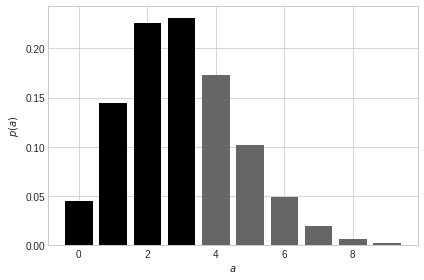

In [ ]:
x = 10
N = 50
theta = 0.06
thres = 4
plt.bar(range(thres), stats.binom.pmf(range(thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

$a$ が `thres` 以上の値を取る確率

In [ ]:
stats.binom.pmf(range(thres, 10000), N, theta).sum()

0.3526966279036804

ボブのレポートにおけるクリック数の標本分布。合計クリック数 $a$ が128以上となる部分を異なる色で示した。

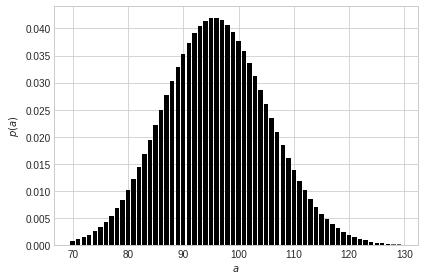

In [ ]:
minx = 70
x = 130
N = 1600
theta = 0.06
thres = 128
plt.bar(range(minx, thres), stats.binom.pmf(range(minx, thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

$a$ が `thres` 以上の値を取る確率

In [ ]:
stats.binom.pmf(range(thres, 10000), N, theta).sum()

0.0007341521761375804

## 付録： マルコフ連鎖が収束しない例

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 7 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


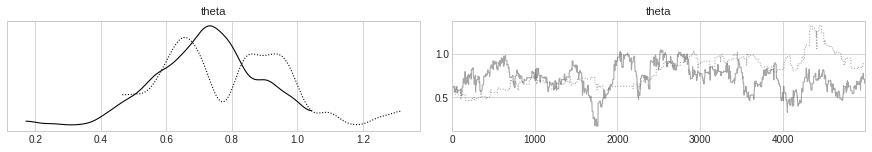

In [ ]:
xs = np.random.normal(loc=0.5, scale=0.1, size=100)
ys = np.random.normal(loc=1 * xs+1, scale=0.3)
with pm.Model() as model:
  alpha = pm.Normal('theta', mu=0, sigma=1)
  beta = pm.Normal('beta', mu=0, sigma=1)
  epsilon = pm.Uniform('epsilon', lower=0, upper=1)
  obs = pm.Normal('a', mu=alpha + beta * xs, sigma=epsilon, observed=ys)
  step = pm.Metropolis()
  trace = pm.sample(5000, step=step)
  pm.traceplot(trace, ['theta'])